# EDA part1

In [1]:
# load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
data = pd.read_csv("data_clean.csv", index_col=0)

In [40]:
data.head()

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,67,5,1,2010,67,S
2,36.0,118.0,8.0,72,5,2,2010,72,C
3,12.0,149.0,12.6,74,5,3,2010,74,PS
4,18.0,313.0,11.5,62,5,4,2010,62,S
5,NaN,NaN,14.3,56,5,5,2010,56,S


In [41]:
data.tail()

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
154,41.0,190.0,7.4,67,5,1,2010,67,C
155,30.0,193.0,6.9,70,9,26,2010,70,PS
156,NaN,145.0,13.2,77,9,27,2010,77,S
157,14.0,191.0,14.3,75,9,28,2010,75,S
158,18.0,131.0,8.0,76,9,29,2010,76,C


In [42]:
# Data structure
type(data)
data.shape

(158, 9)

In [43]:
# data types
data.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Temp C      object
Month       object
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

## Data type conversion

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Temp C   158 non-null    object 
 4   Month    158 non-null    object 
 5   Day      158 non-null    int64  
 6   Year     158 non-null    int64  
 7   Temp     158 non-null    int64  
 8   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 12.3+ KB


In [27]:
# 'Month' and 'Temp C' columns should be of numeric data types
# but they are of object (string) data type
# we should convert these columns inot numeric data type.
# Note : we're only changing the data type of columns not the individual values in the column

In [46]:
# converting the data type of the 'Month' column to numeric data type
# pd.to_numeric() method
data['Month'] = pd.to_numeric(data['Month'], errors='coerce')

# coerce will introduce NA values for non numeric data in the column

In [47]:
# converting the data type of the 'Temp C' column to numeric data type
data['Temp C'] = pd.to_numeric(data['Temp C'], errors = 'coerce')

In [53]:
# Converting the data type of the 'Weather' column to category data type
# use pd.astype() method

data['Weather'] = data['Weather'].astype('category')

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    120 non-null    float64 
 1   Solar.R  151 non-null    float64 
 2   Wind     158 non-null    float64 
 3   Temp C   157 non-null    float64 
 4   Month    157 non-null    float64 
 5   Day      158 non-null    int64   
 6   Year     158 non-null    int64   
 7   Temp     158 non-null    int64   
 8   Weather  155 non-null    category
dtypes: category(1), float64(5), int64(3)
memory usage: 11.4 KB


## Duplicates

In [56]:
# Count the duplicated rows
# use pd.duplicated() method
data.duplicated() # returns boolean values

1      False
2      False
3      False
4      False
5      False
       ...  
154    False
155    False
156    False
157     True
158    False
Length: 158, dtype: bool

In [57]:
# use the above boolean values to index the dataframe

# print the duplicated rows
data[data.duplicated()]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
157,14.0,191.0,14.3,75.0,9.0,28,2010,75,S


In [58]:
data[data.duplicated()].shape

(1, 9)

In [62]:
# Drop the duplicated rows
# use pd.drop_duplicates() method
data_cleaned1 = data.drop_duplicates()

In [64]:
# Now confirm the shape of the dataframe
data.shape, data_cleaned1.shape

((158, 9), (157, 9))

one sample or row has been removed

## Drop columns

In [65]:
# let's drop 'Temp C' column from data_cleaned1 dataframe
# use pd.drop('col name', axis=1)
data_cleaned2 = data_cleaned1.drop('Temp C', axis=1)

In [66]:
data_cleaned1.shape, data_cleaned2.shape

((157, 9), (157, 8))

In [67]:
data_cleaned2.head()

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,5.0,1,2010,67,S
2,36.0,118.0,8.0,5.0,2,2010,72,C
3,12.0,149.0,12.6,5.0,3,2010,74,PS
4,18.0,313.0,11.5,5.0,4,2010,62,S
5,NaN,NaN,14.3,5.0,5,2010,56,S


In [68]:
data_cleaned1.head()

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,67.0,5.0,1,2010,67,S
2,36.0,118.0,8.0,72.0,5.0,2,2010,72,C
3,12.0,149.0,12.6,74.0,5.0,3,2010,74,PS
4,18.0,313.0,11.5,62.0,5.0,4,2010,62,S
5,NaN,NaN,14.3,56.0,5.0,5,2010,56,S


## Rename the columns

In [69]:
# Rename the 'Solar.R' column
# use pd.rename({'current col name' : 'new col name'}, axis=1)
data_cleaned3 = data_cleaned2.rename({'Solar.R':'Solar'}, axis=1)

In [70]:
data_cleaned3.head()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,5.0,1,2010,67,S
2,36.0,118.0,8.0,5.0,2,2010,72,C
3,12.0,149.0,12.6,5.0,3,2010,74,PS
4,18.0,313.0,11.5,5.0,4,2010,62,S
5,NaN,NaN,14.3,5.0,5,2010,56,S


## Outlier Detection

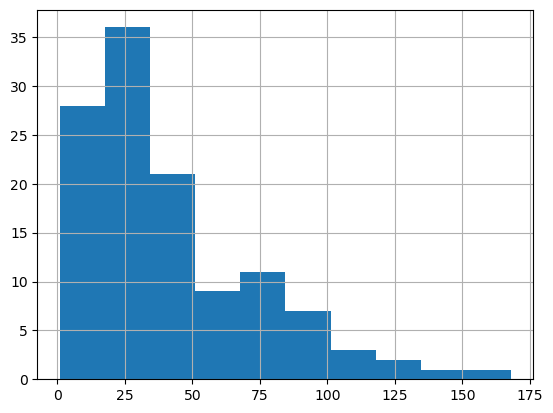

In [72]:
# histogram of ozone
# use series.hist() method
data_cleaned['Ozone'].hist();

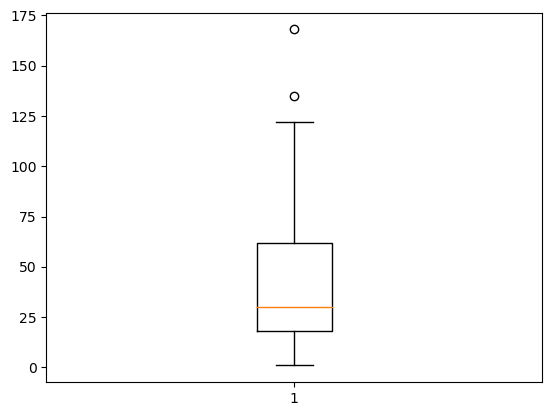

In [73]:
# box plot
# use plt.boxplot(data) method
data_box = data_cleaned3.dropna()
data1_box = data_box['Ozone']
plt.boxplot(data1_box);

dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
***********
dict_values([[<matplotlib.lines.Line2D object at 0x0000023DAD336A30>, <matplotlib.lines.Line2D object at 0x0000023DAD336D00>], [<matplotlib.lines.Line2D object at 0x0000023DAD336FD0>, <matplotlib.lines.Line2D object at 0x0000023DAD3452E0>], [<matplotlib.lines.Line2D object at 0x0000023DAD336760>], [<matplotlib.lines.Line2D object at 0x0000023DAD3455B0>], [<matplotlib.lines.Line2D object at 0x0000023DAD345880>], []])


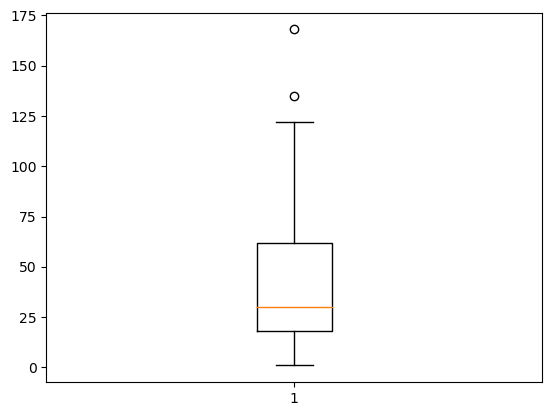

In [92]:
# Extracting outliers or fliers
box = plt.boxplot(data1_box) # will be stored as a dictionary
print(box.keys()) # prints the dict keys
print("***********")
print(box.values())
# type(box)
# print("*********************")
# print(box)
# print("************")
# x = list(box)
# print(x)
# print("************")

In [93]:
box.keys()

dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])

In [98]:
# Extracting outliers. which is nothing but extracting the values associated with
# dictionary key 'fliers'

[item.get_ydata() for item in box['fliers']]

[array([135., 168.])]

In [100]:
# to get whiskers
# [item.get_ydata() for item in box['whiskers']]
[item.get_ydata()[1] for item in box['whiskers']] # [1] is for y value

[1.0, 122.0]

In [101]:
# Descriptive stats
data_cleaned3['Ozone'].describe()

count    119.000000
mean      41.815126
std       32.659249
min        1.000000
25%       18.000000
50%       31.000000
75%       62.000000
max      168.000000
Name: Ozone, dtype: float64

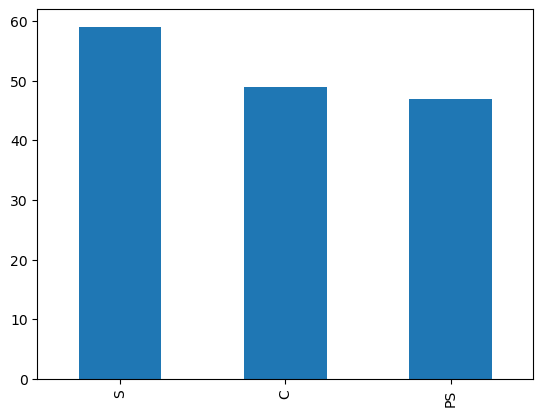

In [106]:
# Bar plot to see if there is any outlier in the categorical column 'Weather'
data['Weather'].value_counts().plot.bar();

## Missing values and imputation

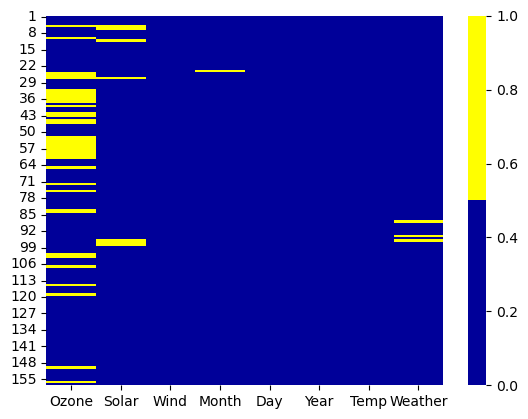

In [107]:
import seaborn as sns

# plot sns.heatmap() to check the missing values

# getting the columns
cols = data_cleaned3.columns
# specifying the colours
colours = ['#000099', '#ffff00'] # #000099 : blue -> non missing values, #ffff00 : yellow -> missing values
# plotting the heatmap
sns.heatmap(data_cleaned3[cols].isnull(),
           cmap=sns.color_palette(colours));

In [110]:
# checking if there is any missing value
missing_value_rows = data_cleaned3.isnull().any(axis=1) # missing value row filter
missing_value_rows

1      False
2      False
3      False
4      False
5       True
       ...  
153    False
154    False
155    False
156     True
158    False
Length: 157, dtype: bool

In [113]:
# printing the rows which have missing values in them
data_cleaned3[missing_value_rows].head()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
5,NaN,NaN,14.3,5.0,5,2010,56,S
6,28.0,NaN,14.9,5.0,6,2010,66,C
10,NaN,194.0,8.6,5.0,10,2010,69,S
11,7.0,NaN,6.9,5.0,11,2010,74,C
24,32.0,92.0,12.0,NaN,24,2010,61,C


In [115]:
# getting the sum of missing values for each column
data_cleaned3.isnull().sum()

Ozone      38
Solar       7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

In [116]:
# Mean Imputation
mean = data_cleaned3['Ozone'].mean() # getting the mean for 'Ozone' column
print(mean)

41.81512605042017


In [118]:
# y = data_cleaned3['Ozone']
# print(type(y))

In [119]:
# filling the missing values with mean
# use series.fillna() method
data_cleaned3['Ozone'] = data_cleaned3['Ozone'].fillna(mean)

In [121]:
# checking for missing values after missing value imputation
data_cleaned3['Ozone'].isnull().sum()

0

In [122]:
data_cleaned3.isnull().sum()

Ozone      0
Solar      7
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [127]:
# Missing value imputation for categorical value
# Get the object columns
obj_columns = data_cleaned3[['Weather']]

In [128]:
obj_columns.isnull().sum()

Weather    3
dtype: int64

In [129]:
# Missing value imputation with mode for categorical value
mode_value = obj_columns.mode()
mode_value

,Weather
0,S


In [130]:
mode_value.iloc[0]

Weather    S
Name: 0, dtype: category
Categories (3, object): ['C', 'PS', 'S']

In [131]:
obj_columns = obj_columns.fillna(mode_value.iloc[0])

In [132]:
# checking for missing values after imputation
obj_columns['Weather'].isnull().sum()

0

In [136]:
data_cleaned3['Weather'].value_counts()

S     58
C     49
PS    47
Name: Weather, dtype: int64

In [137]:
obj_columns['Weather'].value_counts()

S     61
C     49
PS    47
Name: Weather, dtype: int64

In [ ]:
# Drop the 'Weather' column from data_cleaned3 dataframe
data_cleaned3.drop(['Weather'], axis=1, inplace=True)

In [147]:
data_cleaned3.columns # doesn't have 'Weather' column

Index(['Ozone', 'Solar', 'Wind', 'Month', 'Day', 'Year', 'Temp'], dtype='object')

In [148]:
# Join the data set with imputed object dataset
# use pd.concat() method
data_cleaned4 = pd.concat([data_cleaned3, obj_columns], axis=1)

In [149]:
data_cleaned4.isnull().sum()

Ozone      0
Solar      7
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

In [150]:
data_cleaned4.head()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
1,41.000000,190.0,7.4,5.0,1,2010,67,S
2,36.000000,118.0,8.0,5.0,2,2010,72,C
3,12.000000,149.0,12.6,5.0,3,2010,74,PS
4,18.000000,313.0,11.5,5.0,4,2010,62,S
5,41.815126,NaN,14.3,5.0,5,2010,56,S


## Scatter plot and Correlation analysis

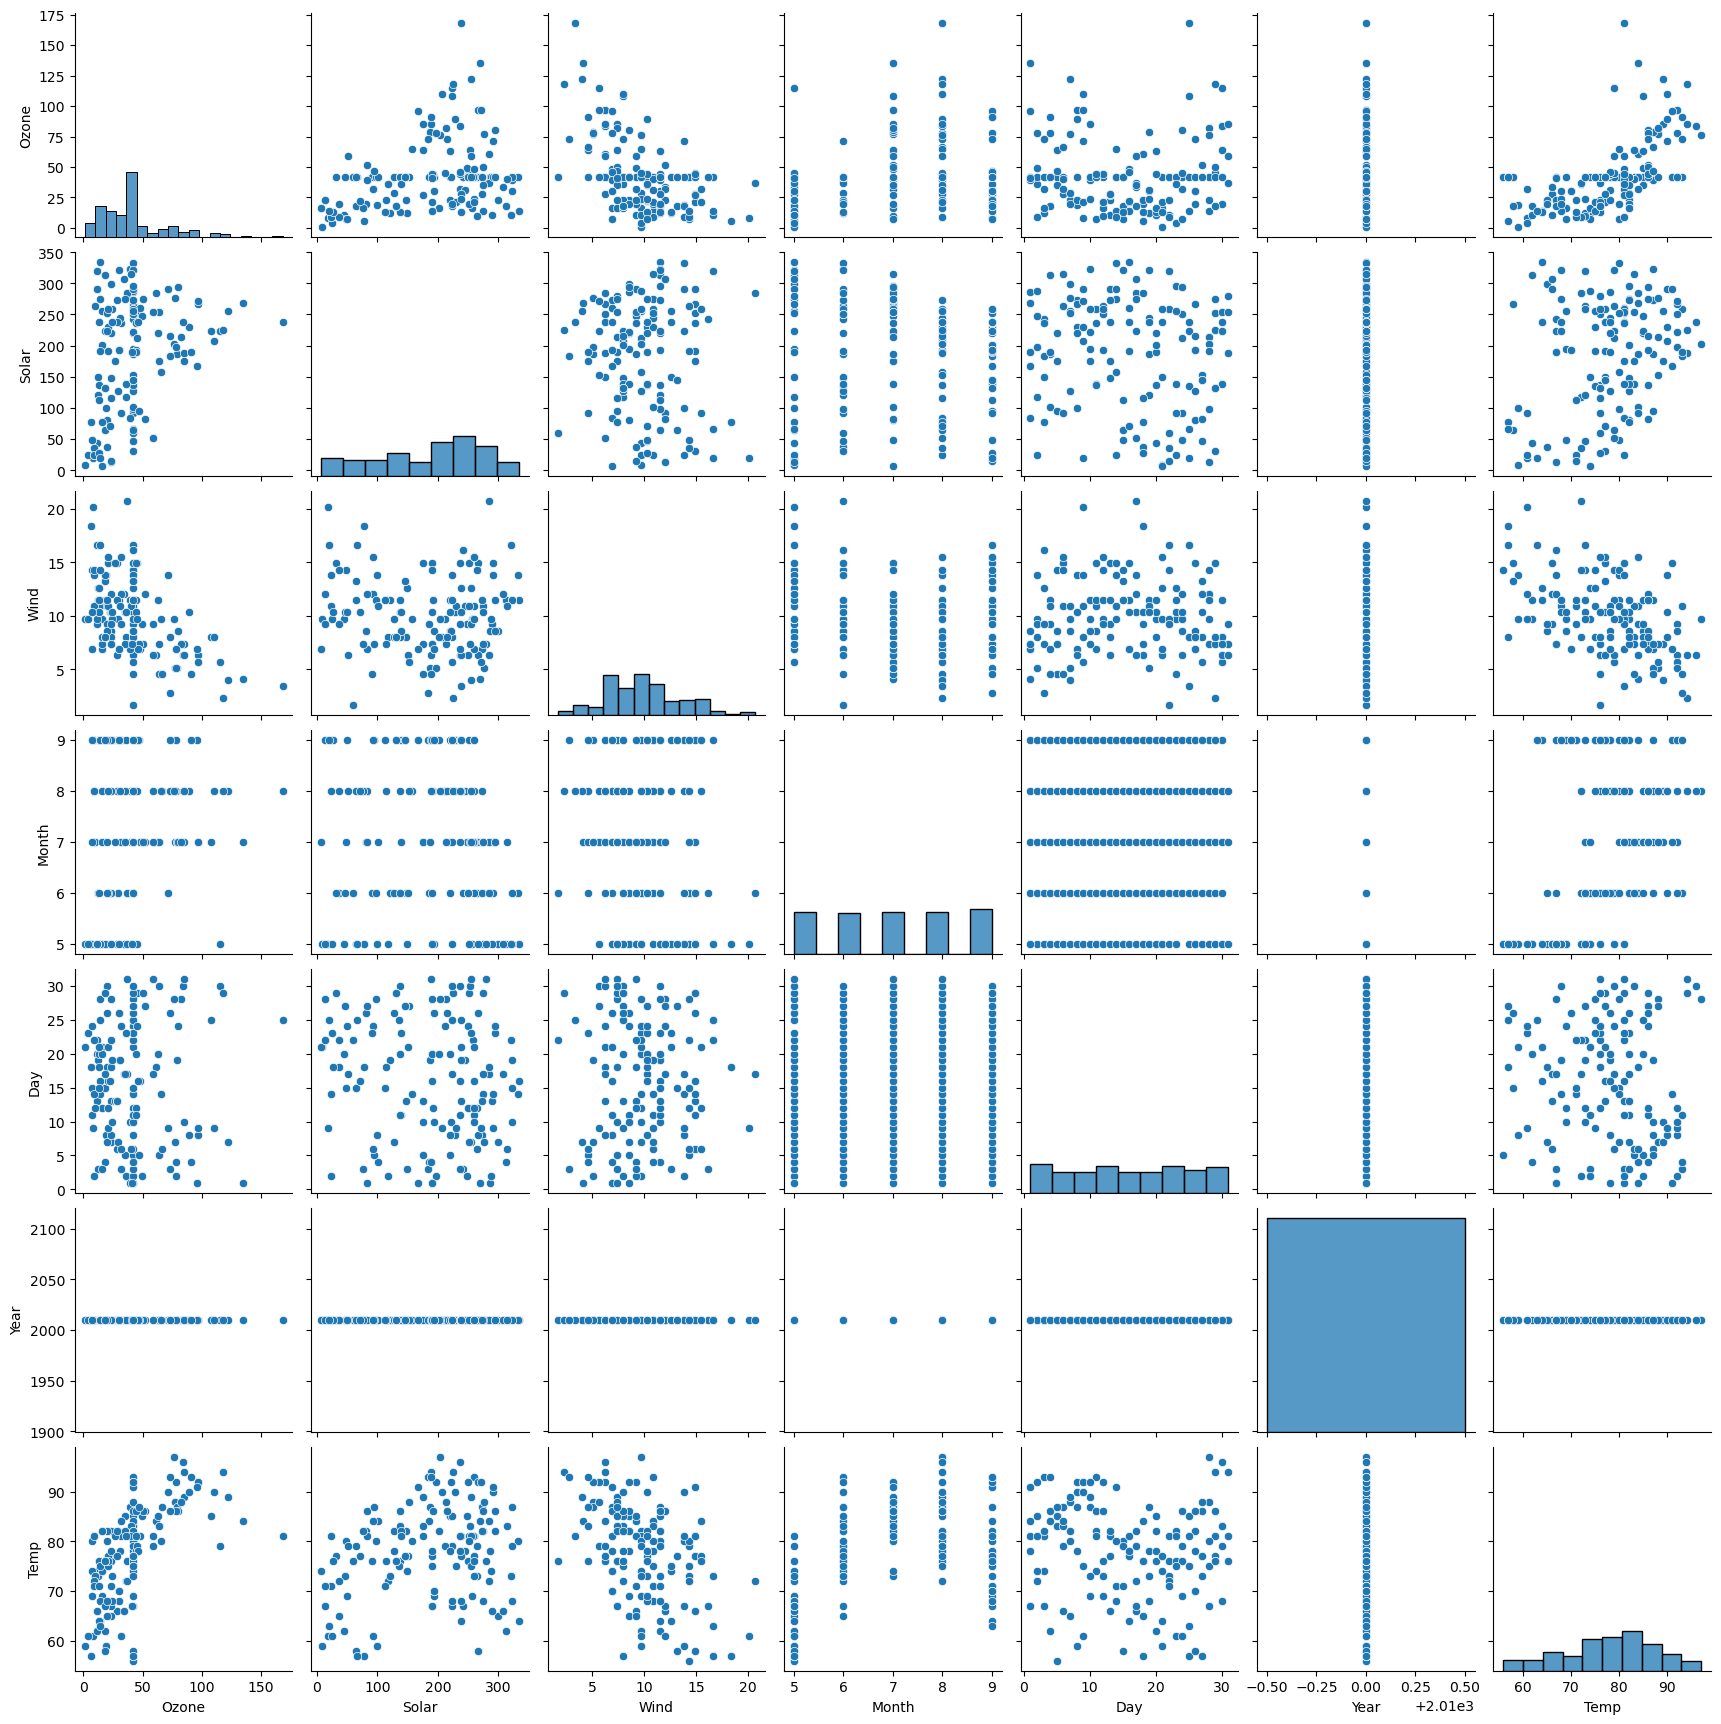

In [151]:
# Seaborn visualization library
import seaborn as sns
# create the defualt pairplot
sns.pairplot(data_cleaned4)

In [156]:
# correlation matrix : use pd.corr() method
corr_mat = data_cleaned4.corr()
corr_mat

,Ozone,Solar,Wind,Month,Day,Year,Temp
Ozone,1.000000,0.308687,-0.520004,0.132860,-0.021916,NaN,0.606500
Solar,0.308687,1.000000,-0.057407,-0.094012,-0.155663,NaN,0.273558
Wind,-0.520004,-0.057407,1.000000,-0.166216,0.029900,NaN,-0.441228
Month,0.132860,-0.094012,-0.166216,1.000000,0.050055,NaN,0.398516
Day,-0.021916,-0.155663,0.029900,0.050055,1.000000,NaN,-0.122787
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temp,0.606500,0.273558,-0.441228,0.398516,-0.122787,NaN,1.000000


In [157]:
# correlation for 'Year' is un-defined
data_cleaned4['Year']

1      2010
2      2010
3      2010
4      2010
5      2010
       ... 
153    2010
154    2010
155    2010
156    2010
158    2010
Name: Year, Length: 157, dtype: int64

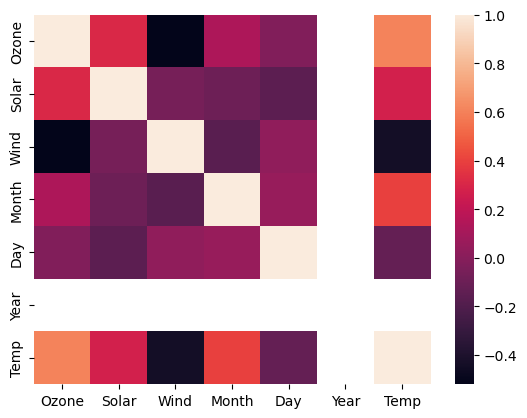

In [154]:
# visualizing correlation matrix in seaborn heatmap
sns.heatmap(corr_mat);

## Transformations

### Dummy Variable

In [158]:
data_cleaned4.head()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
1,41.000000,190.0,7.4,5.0,1,2010,67,S
2,36.000000,118.0,8.0,5.0,2,2010,72,C
3,12.000000,149.0,12.6,5.0,3,2010,74,PS
4,18.000000,313.0,11.5,5.0,4,2010,62,S
5,41.815126,NaN,14.3,5.0,5,2010,56,S


In [160]:
# checking the unique values or categories in 'Weather' column
data_cleaned4['Weather'].unique()

['S', 'C', 'PS']
Categories (3, object): ['C', 'PS', 'S']

In [165]:
# Creating dummy variable for 'Weather' column
# use pd.get_dummies() method
data_cleaned4 = pd.get_dummies(data_cleaned4, columns = ['Weather'])

In [166]:
# help(pd.get_dummies)
data_cleaned4.head()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather_C,Weather_PS,Weather_S
1,41.000000,190.0,7.4,5.0,1,2010,67,0,0,1
2,36.000000,118.0,8.0,5.0,2,2010,72,1,0,0
3,12.000000,149.0,12.6,5.0,3,2010,74,0,1,0
4,18.000000,313.0,11.5,5.0,4,2010,62,0,0,1
5,41.815126,NaN,14.3,5.0,5,2010,56,0,0,1


In [170]:
data.shape, data_cleaned3.shape, data_cleaned4.shape

((158, 9), (157, 7), (157, 10))

## Normalization of data : MinMaxScaler()


In [171]:
# Normalization of the data
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [172]:
data_cleaned4.values

array([[ 41.        , 190.        ,   7.4       , ...,   0.        ,
          0.        ,   1.        ],
       [ 36.        , 118.        ,   8.        , ...,   1.        ,
          0.        ,   0.        ],
       [ 12.        , 149.        ,  12.6       , ...,   0.        ,
          1.        ,   0.        ],
       ...,
       [ 30.        , 193.        ,   6.9       , ...,   0.        ,
          1.        ,   0.        ],
       [ 41.81512605, 145.        ,  13.2       , ...,   0.        ,
          0.        ,   1.        ],
       [ 18.        , 131.        ,   8.        , ...,   1.        ,
          0.        ,   0.        ]])

In [173]:
data_cleaned4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 1 to 158
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Ozone       157 non-null    float64
 1   Solar       150 non-null    float64
 2   Wind        157 non-null    float64
 3   Month       156 non-null    float64
 4   Day         157 non-null    int64  
 5   Year        157 non-null    int64  
 6   Temp        157 non-null    int64  
 7   Weather_C   157 non-null    uint8  
 8   Weather_PS  157 non-null    uint8  
 9   Weather_S   157 non-null    uint8  
dtypes: float64(4), int64(3), uint8(3)
memory usage: 14.3 KB


In [176]:
# the input data should be in an array form
array = data_cleaned4.values

# creating an instance of the MinMaxScaler()
scaler = MinMaxScaler(feature_range=(0,1))

# fitting and transforming the data
# when we fit the scaler to data, it learn the parameters (min, max, mean)
# when we transform the data, it transforms each value in the data
rescaledX = scaler.fit_transform(array)

# transformed data
set_printoptions(precision=2)
print(rescaledX[0:5, :])

[[0.24 0.56 0.3  0.   0.   0.   0.27 0.   0.   1.  ]
 [0.21 0.34 0.33 0.   0.03 0.   0.39 1.   0.   0.  ]
 [0.07 0.43 0.57 0.   0.07 0.   0.44 0.   1.   0.  ]
 [0.1  0.94 0.52 0.   0.1  0.   0.15 0.   0.   1.  ]
 [0.24  nan 0.66 0.   0.13 0.   0.   0.   0.   1.  ]]


## Standardize the data : StandardScaler()

In [179]:
# Standardize the data (0 mean, 1 std dev)
from sklearn.preprocessing import StandardScaler

In [184]:
# input data array
array2 = data_cleaned4.values

# creating an instance of the StandardScaler()
std_scaler = StandardScaler()

# fitting the std_scaler to our data and it learns the parameters
std_scaler.fit(array)

# transforming the data
rescaledX2 = std_scaler.transform(array)

# summarize transformed data
set_printoptions(precision=2)
print(rescaledX2[0:5, :])

[[-0.03  0.05 -0.72 -1.43 -1.67  0.   -1.15 -0.67 -0.65  1.25]
 [-0.21 -0.76 -0.55 -1.43 -1.56  0.   -0.61  1.48 -0.65 -0.8 ]
 [-1.05 -0.41  0.76 -1.43 -1.45  0.   -0.4  -0.67  1.53 -0.8 ]
 [-0.84  1.44  0.45 -1.43 -1.33  0.   -1.68 -0.67 -0.65  1.25]
 [ 0.     nan  1.25 -1.43 -1.22  0.   -2.32 -0.67 -0.65  1.25]]


In [185]:
help(StandardScaler)

Help on class StandardScaler in module sklearn.preprocessing._data:

class StandardScaler(sklearn.base._OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  StandardScaler(*, copy=True, with_mean=True, with_std=True)
 |  
 |  Standardize features by removing the mean and scaling to unit variance.
 |  
 |  The standard score of a sample `x` is calculated as:
 |  
 |      z = (x - u) / s
 |  
 |  where `u` is the mean of the training samples or zero if `with_mean=False`,
 |  and `s` is the standard deviation of the training samples or one if
 |  `with_std=False`.
 |  
 |  Centering and scaling happen independently on each feature by computing
 |  the relevant statistics on the samples in the training set. Mean and
 |  standard deviation are then stored to be used on later data using
 |  :meth:`transform`.
 |  
 |  Standardization of a dataset is a common requirement for many
 |  machine learning estimators: they might behave badly if the
 |  individual fea

In [186]:
std_scaler.fit(array).mean_ # when the scaler is fitted to the data it learns the 'mean' for each column

array([4.18e+01, 1.85e+02, 9.93e+00, 7.03e+00, 1.59e+01, 2.01e+03,
       7.77e+01, 3.12e-01, 2.99e-01, 3.89e-01])

## Speed up the EDA process

In [187]:
!pip install pandas-profiling
!pip install sweetviz

     -------------------------------------- 325.0/325.0 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 2.1/2.1 MB 1.0 MB/s eta 0:00:00
     ------------------------------------ 102.7/102.7 kB 983.4 kB/s eta 0:00:00
     -------------------------------------- 685.8/685.8 kB 1.0 MB/s eta 0:00:00
     ---------------------------------------- 4.7/4.7 MB 832.3 kB/s eta 0:00:00
     ------------------------------------ 296.5/296.5 kB 914.7 kB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=5a35effc3ce6263ca137fdf5e6a006c1283360b178274d8817149c8719677dde
  Stored in directory: c:\users\manoj\appdata\local\pip\cache\wheels\1d\05\04\c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
Successfully built htmlmin
     ---------------------------------------- 15.1/15.1 MB 1.3 MB/s eta 0:00:00


In [189]:
import pandas_profiling as pp
import sweetviz as sv

In [193]:
# generating the EDA report using pandas profiling
EDA_report = pp.ProfileReport(data)

# exporting or outputing the report to an html file
EDA_report.to_file(output_file = 'Weather_EDA_report_with_pandas_profiler.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [192]:
# generating the EDA report using sweetviz
sweet_report = sv.analyze(data)

# exporting the report to an html file
sweet_report.show_html('weather_EDA_report_with_sweetviz.html')

                                             |                                             | [  0%]   00:00 ->…

Report weather_EDA_report_with_sweetviz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
